In [1]:

import os, sys
os.getcwd()
os.chdir('/content/drive/My Drive/Dask/frauddetectionchallenge')
os.listdir()

['Dask.ipynb', 'sample sub.csv', 'test.csv', 'train.csv']

In [2]:
!pip install dask

In [3]:
import dask.dataframe as dd
train_data = dd.read_csv('train.csv')
test_data = dd.read_csv('test.csv')
train_data.head()

,id,transaction time,current bank amount,last bank amount,time taken (seconds),most recent bank amount,account type,marital_status,age,occupation,credit card type,account source verification,transaction source method,account destination verification,fradulent
0,acus0,2016-10-05T01:44:58,43671,1151263,2299,348764,saving,married,46,musician,master,True,False,True,0
1,acus1,2015-01-14T15:05:07,7442,1062843,4553,225114,current,single,64,accounting,master,True,False,False,0
2,acus2,2016-10-28T13:44:58,40102,48042,1493,420486,current,married,41,farmer,master,True,True,True,0
3,acus3,2016-11-20T15:05:32,61024,1441746,544,239663,current,unknown,66,clergy,master,True,True,True,0
4,acus4,2015-09-01T16:11:57,22867,510656,4581,432337,current,married,78,accounting,verve,False,False,True,1


In [4]:
test_data.head()

,id,transaction time,current bank amount,last bank amount,time taken (seconds),most recent bank amount,account type,marital_status,age,occupation,credit card type,account source verification,transaction source method,account destination verification
0,bcus2993,2016-06-28T12:51:43,88677,1059697,3033,29964,current,unknown,78,accounting,verve,True,True,False
1,bcus2994,2015-12-16T18:04:03,85737,434908,3025,354835,current,single,38,farmer,master,True,False,False
2,bcus2995,2016-10-15T04:06:55,14611,1287631,2414,395445,current,unknown,47,banking,master,True,False,False
3,bcus2996,2014-03-15T04:40:45,53130,61604,1228,204872,current,single,74,clergy,master,False,False,True
4,bcus2997,2015-05-25T05:09:33,20643,1143031,1031,207262,current,married,72,lawyer,master,True,False,True


# check columns

In [5]:
train_data.columns

Index(['id', 'transaction time', 'current bank amount', 'last bank amount',
       'time taken (seconds)', 'most recent bank amount', 'account type',
       'marital_status', 'age', 'occupation', 'credit card type',
       'account source verification', 'transaction source method',
       'account destination verification', 'fradulent'],
      dtype='object')

# check descriptive analysis

In [6]:
train_data.describe().compute()

,current bank amount,last bank amount,time taken (seconds),most recent bank amount,age,fradulent
count,10493.000000,1.049300e+04,10493.000000,10493.000000,10493.000000,10493.000000
mean,50001.984656,7.492752e+05,2508.627657,250768.667588,54.649004,0.276661
std,28681.350627,4.336081e+05,1432.820357,144145.272817,14.350928,0.447369
min,1.000000,8.000000e+00,4.000000,34.000000,30.000000,0.000000
25%,25243.000000,3.787840e+05,1282.000000,126333.000000,42.000000,0.000000
50%,50093.000000,7.485950e+05,2520.000000,253174.000000,55.000000,0.000000
75%,74539.000000,1.126013e+06,3710.000000,376461.000000,67.000000,1.000000
max,99989.000000,1.499877e+06,4999.000000,499926.000000,79.000000,1.000000


In [7]:
train_data.compute().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   id                                10493 non-null  object
 1   transaction time                  10493 non-null  object
 2   current bank amount               10493 non-null  int64 
 3   last bank amount                  10493 non-null  int64 
 4   time taken (seconds)              10493 non-null  int64 
 5   most recent bank amount           10493 non-null  int64 
 6   account type                      10493 non-null  object
 7   marital_status                    10493 non-null  object
 8   age                               10493 non-null  int64 
 9   occupation                        10493 non-null  object
 10  credit card type                  10493 non-null  object
 11  account source verification       10493 non-null  bool  
 12  transaction source

# marital status

In [8]:
def individual_count(data, key):
    return data[key].value_counts()

individual_count(train_data.compute(), 'marital_status')



married    5270
single     3122
unknown    2101
Name: marital_status, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


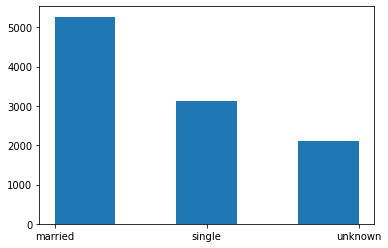

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(train_data['marital_status'].compute(), bins = 5)
plt.show()

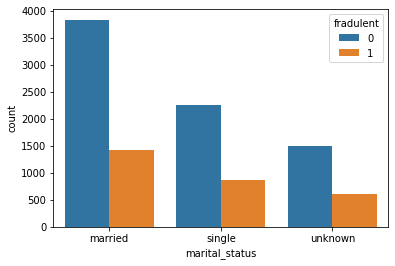

In [10]:
sns.countplot(x = 'marital_status', hue = 'fradulent', data = train_data.compute())

In [0]:


train_data = train_data.compute().drop(['id', 'current bank amount', 'last bank amount','most recent bank amount'], axis = 1)
test_id = test_data['id']
test_data = test_data.compute().drop(['current bank amount', 'last bank amount','most recent bank amount'], axis = 1)



# Data visualization

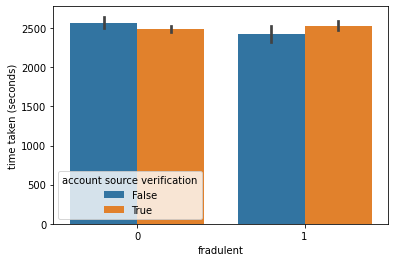

In [12]:

sns.barplot(x = 'fradulent', y = 'time taken (seconds)', hue = 'account source verification', data = train_data,
           orient = 'vertical')



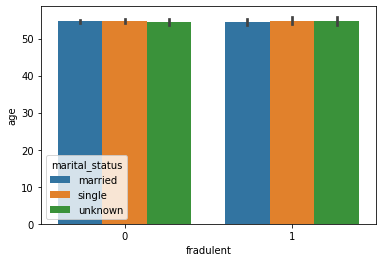

In [13]:
sns.barplot(x = 'fradulent', y = 'age', hue = 'marital_status', data = train_data,
           orient = 'vertical')

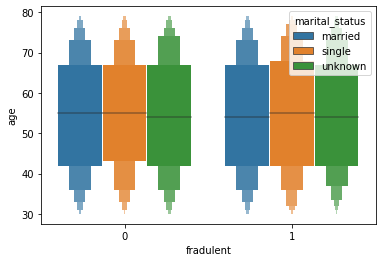

In [14]:
sns.boxenplot(x = 'fradulent', y = 'age', hue = 'marital_status', data = train_data)

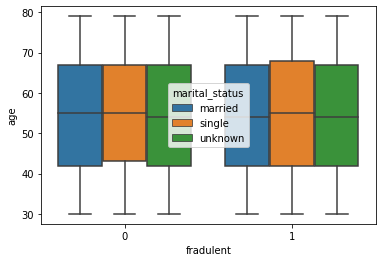

In [15]:
sns.boxplot(x = 'fradulent', y = 'age', hue = 'marital_status', data = train_data)

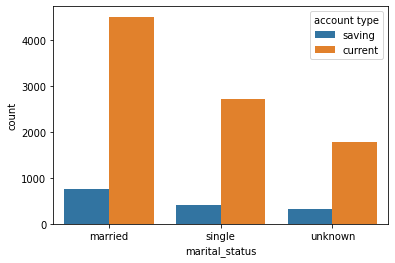

In [16]:
sns.countplot(x = 'marital_status', hue = 'account type', data = train_data)

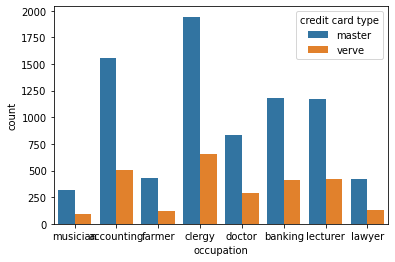

In [17]:
sns.countplot(x = 'occupation', hue = 'credit card type', data = train_data)

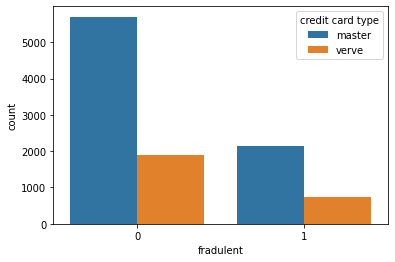

In [18]:
sns.countplot(x = 'fradulent', hue = 'credit card type', data = train_data)

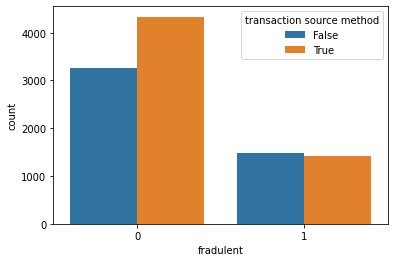

In [19]:
sns.countplot(x = 'fradulent', hue = 'transaction source method', data = train_data)

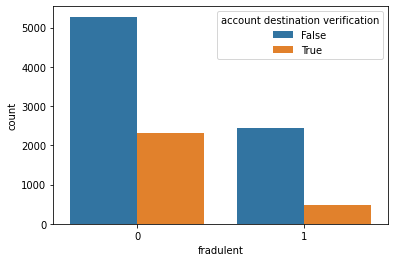

In [20]:
sns.countplot(x = 'fradulent', hue = 'account destination verification', data = train_data)

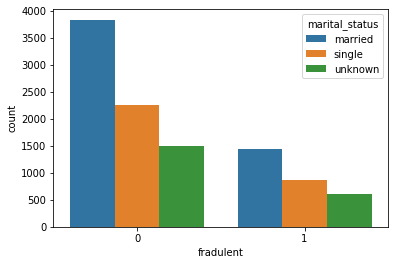

In [21]:
sns.countplot(x = 'fradulent', hue = 'marital_status', data = train_data)

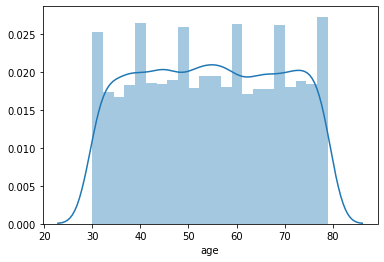

In [22]:
sns.distplot(train_data['age'])

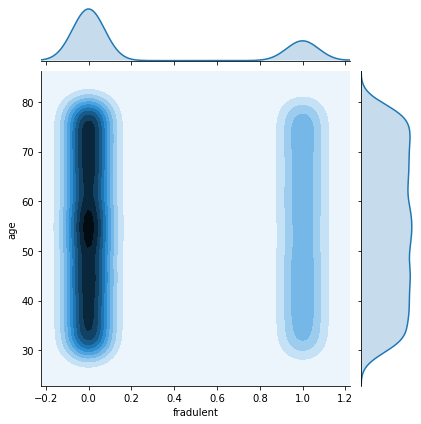

In [23]:
sns.jointplot(x = 'fradulent', y = 'age', kind = 'kde', data = train_data)

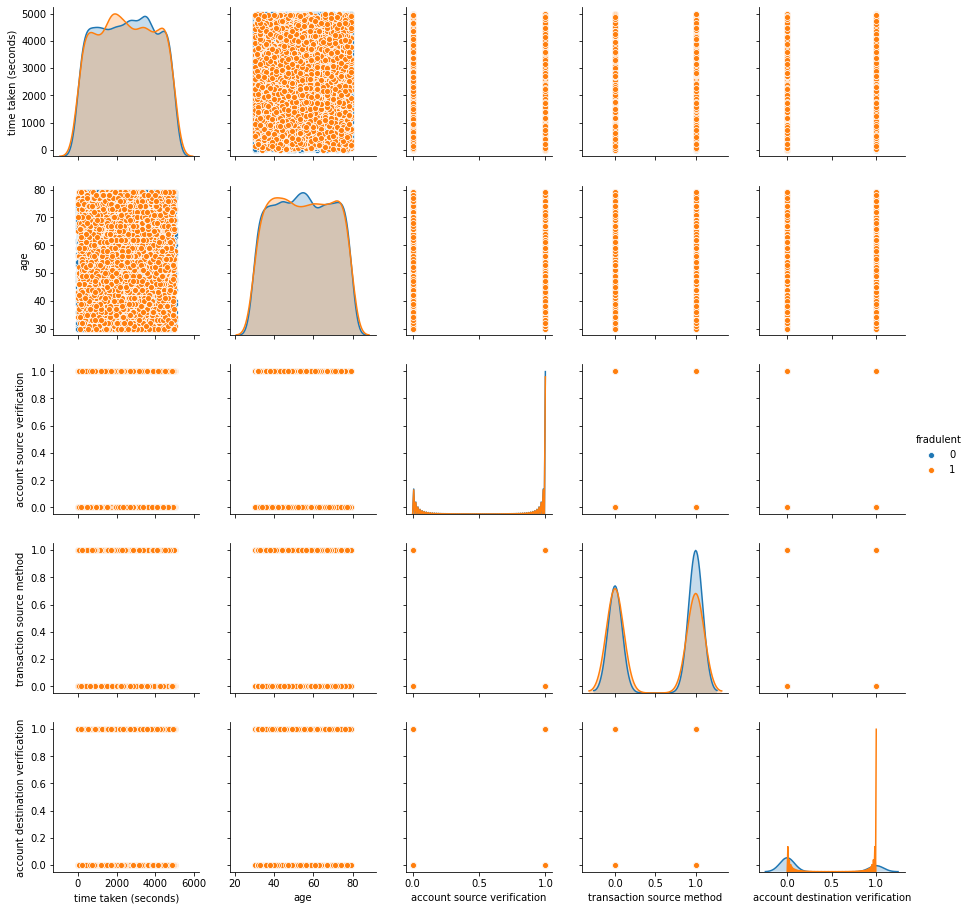

In [24]:
sns.pairplot(data = train_data, hue= 'fradulent')

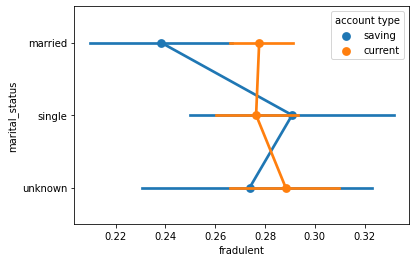

In [25]:
sns.pointplot(y = 'marital_status',x = 'fradulent', hue = 'account type', data = train_data)

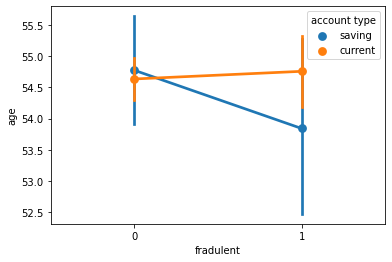

In [26]:
sns.pointplot(y = 'age',x = 'fradulent', hue = 'account type', data = train_data)

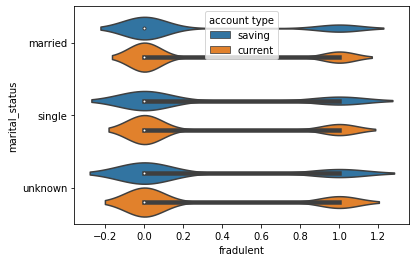

In [27]:
sns.violinplot(y = 'marital_status',x = 'fradulent', hue = 'account type', data = train_data)

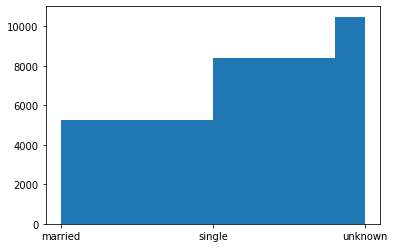

In [28]:
plt.hist(train_data['marital_status'], stacked = True, histtype = 'bar', cumulative = True)
plt.box(True)
plt.show()

# Transaction time

In [0]:
train_target = train_data['fradulent']
train_data = train_data.drop('fradulent', axis = 1)

In [30]:
test = train_data['transaction time'][0]
time_year, time_month, time_day, time_hour, time_minute, time_seconds = [],[],[],[],[],[]
def split_data(test):
    val = test.split(':')
    minutes = val[1]
    time_minute.append(int(minutes))
    seconds = val[2]
    time_seconds.append(int(seconds))
    out_val = val[0].split('-')
    year =out_val[0]
    time_year.append(int(year))
    month = out_val[1]
    time_month.append(int(month))
    out_split = out_val[2].split('T')
    day = out_split[0]
    time_day.append(int(day))
    hour = out_split[1]
    time_hour.append(int(hour))
    return year, month, day, hour, minutes, seconds

split_data(test)

('2016', '10', '05', '01', '44', '58')

In [0]:
#train
time_year, time_month, time_day, time_hour, time_minute, time_seconds = [],[],[],[],[],[]
time_out = train_data['transaction time'].apply(split_data)
#train_data['time year'] = time_year
#train_data['time month'] = time_month
#train_data['time day'] = time_day
train_data['time hour'] = time_hour
train_data['time minute'] = time_minute
train_data['time seconds'] = time_seconds

#test
time_year, time_month, time_day, time_hour, time_minute, time_seconds = [],[],[],[],[],[]
test_time_out = test_data['transaction time'].apply(split_data)
#test_data['time year'] = time_year
#test_data['time month'] = time_month
#test_data['time day'] = time_day
test_data['time hour'] = time_hour
test_data['time minute'] = time_minute
test_data['time seconds'] = time_seconds


In [0]:
train_data = train_data.drop('transaction time', axis = 1)
test_data = test_data.drop('transaction time', axis = 1)


In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   time taken (seconds)              10493 non-null  int64 
 1   account type                      10493 non-null  object
 2   marital_status                    10493 non-null  object
 3   age                               10493 non-null  int64 
 4   occupation                        10493 non-null  object
 5   credit card type                  10493 non-null  object
 6   account source verification       10493 non-null  bool  
 7   transaction source method         10493 non-null  bool  
 8   account destination verification  10493 non-null  bool  
 9   time hour                         10493 non-null  int64 
 10  time minute                       10493 non-null  int64 
 11  time seconds                      10493 non-null  int64 
dtypes: bool(3), int64(

In [34]:
#train = pd.get_dummies(train_data, columns = ['account type', 'marital_status', 'occupation','credit card type'])
train = train_data.drop(['account type', 'marital_status','occupation','credit card type'], axis = 1)
test = test_data.drop(['account type', 'marital_status','occupation','credit card type'], axis = 1)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   time taken (seconds)              10493 non-null  int64
 1   age                               10493 non-null  int64
 2   account source verification       10493 non-null  bool 
 3   transaction source method         10493 non-null  bool 
 4   account destination verification  10493 non-null  bool 
 5   time hour                         10493 non-null  int64
 6   time minute                       10493 non-null  int64
 7   time seconds                      10493 non-null  int64
dtypes: bool(3), int64(5)
memory usage: 440.7 KB


# encoding

In [0]:
#!pip install dask_ml
#!pip install tornado==4.5.1 
#!pip install distributed==1.25.3 dask-ml

In [0]:
from dask_ml.preprocessing import LabelEncoder

In [0]:
labelencoder = LabelEncoder()
train['account source verification'] = labelencoder.fit_transform(train['account source verification'])
train['account destination verification'] = labelencoder.fit_transform(train['account destination verification'])
train['transaction source method'] = labelencoder.fit_transform(train['transaction source method'])

In [0]:
test['account source verification'] = labelencoder.fit_transform(test['account source verification'])
test['account destination verification'] = labelencoder.fit_transform(test['account destination verification'])
test['transaction source method'] = labelencoder.fit_transform(test['transaction source method'])

In [0]:
train = train.drop('time taken (seconds)', axis = 1)
test = test.drop('time taken (seconds)', axis = 1)

In [0]:


train = train.drop('age', axis = 1)
test = test.drop('age', axis = 1)

In [41]:
test_id = test['id']
test = test.drop('id',axis = 1)
train.shape, test.shape

((10493, 6), (4507, 6))

In [0]:
for k in train.columns:
    if k in test.columns:
        pass
    else:
        print(k)

In [0]:
from dask_ml.preprocessing import StandardScaler, MinMaxScaler
std_scaler = MinMaxScaler()
train_transform = std_scaler.fit_transform(train)
test_transform = std_scaler.transform(test)

In [0]:


from dask_ml.model_selection import train_test_split
from dask_ml.model_selection import train_test_split
from dask_ml.linear_model import LogisticRegression
from dask_ml.metrics import accuracy_score, log_loss



In [0]:
x_train, x_test, y_train, y_test = train_test_split(train_transform, train_target, test_size = 0.3, random_state = 42)

In [59]:
x_train[:4]

,account source verification,transaction source method,account destination verification,time hour,time minute,time seconds
2577,1.0,0.0,0.0,0.826087,0.067797,0.203390
4588,0.0,0.0,0.0,0.043478,0.610169,0.745763
3098,0.0,0.0,1.0,0.173913,0.915254,0.474576
6522,1.0,1.0,1.0,0.347826,0.898305,0.576271


In [74]:
lr = LogisticRegression()

import dask.array as da
x_tra = da.compute(x_train)
y_tra = da.compute(y_train)
lr.fit(x_train.values, y_train.values)

LogisticRegression()

In [76]:
lr.score(x_train.values,y_train.values)

0.7176310415248468

In [0]:
predict = lr.predict(x_test.values)

In [80]:
def result(pred, y_pred):
  acc = accuracy_score(pred, y_pred)
  loss = log_loss(pred, y_pred)
  print('accuracy is: ', acc)
  print('log loss is: ', loss)
  return

result(predict, y_test.values)

accuracy is:  0.7264930114358322
log loss is:  9.446774267668934
